In [4]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import sequential
from keras.layers import Dense, Flatten, Dropout , Conv2D, MaxPooling2D
#droupout Ewgularization for  getrid overfiting problem
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# numbers of classes - don not match  unless data changes
num_classes = 10


In [7]:
#size of batch and # of epoch data
batch_size = 64
epochs = 10

In [8]:
#input img dimension
img_rows , img_cols = 28,28

In [9]:
#the data shuffled and split between train test set
(x_train , y_train) , (x_test,y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
# define img we resize all img in 28X28 size / increasing img size can also increase computational time and power [process etc]
x_test.shape



(10000, 28, 28)

In [12]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
#reshaping data
x_train = x_train.reshape(x_train.shape[0], img_rows , img_cols,1)
x_test = x_test.reshape(x_test.shape[0], img_rows , img_cols,1)
input_shape = (img_rows , img_cols,1)

In [14]:
input_shape

(28, 28, 1)

In [15]:
x_train.shape


(60000, 28, 28, 1)

In [16]:
# type convert and scale the test and training data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape' , x_train.shape)
print('x_test shape', x_test.shape)
print(y_train[0:3])

x_train shape (60000, 28, 28, 1)
x_test shape (10000, 28, 28, 1)
[9 0 0]


In [17]:
# covert class vectors to binary class metrics. one_hot encoding
# 3 => 0 0 0 0 1  0 0 0  and >= 0 1 0 0 0 0 0
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test , num_classes)
print(y_train[0:2]) # verify one hot encoding

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


**Cnn code**

In [19]:
#defin model
model = Sequential()

In [20]:
num_classes

10

In [22]:
# create cnn to classify img

model.add(Conv2D(32, kernel_size=(3,3),
                 activation = 'relu',
                 input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2 ,2)))
model.add(Flatten())
model.add(Dense(128 , activation='relu'))
model.add(Dense(64 , activation='relu'))
model.add(Dense(num_classes , activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
from re import VERBOSE
#define compile minimize categorical loss , use delta optimized and optimize to maximum accuracy
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
#Train model and test/validate the model with test data after each cycle(qpoch ) through training data
# Return history of loss accuracy of each epoch

hist = model.fit(x_train , y_train,
                 batch_size = 64,
                 epochs= 24,
                 verbose=1 ,
                 validation_data=(x_test , y_test))

Epoch 1/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7093 - loss: 0.7833 - val_accuracy: 0.8367 - val_loss: 0.4393
Epoch 2/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8620 - loss: 0.3745 - val_accuracy: 0.8767 - val_loss: 0.3429
Epoch 3/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8842 - loss: 0.3160 - val_accuracy: 0.8821 - val_loss: 0.3177
Epoch 4/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8954 - loss: 0.2814 - val_accuracy: 0.8952 - val_loss: 0.2839
Epoch 5/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9074 - loss: 0.2507 - val_accuracy: 0.9011 - val_loss: 0.2730
Epoch 6/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9160 - loss: 0.2256 - val_accuracy: 0.9015 - val_loss: 0.2725
Epoch 7/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9224 - loss: 0.2098 - val_accuracy: 0.9013 - val_loss: 0.2629
Epoch 8/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9243 - loss: 0.1996 - val_accuracy: 0

In [30]:
hist.history

{'accuracy': [0.797249972820282,
  0.8706499934196472,
  0.8889999985694885,
  0.8983500003814697,
  0.9066333174705505,
  0.9134500026702881,
  0.9191166758537292,
  0.9249500036239624,
  0.9307500123977661,
  0.9348499774932861,
  0.9387666583061218,
  0.9435666799545288,
  0.9470499753952026,
  0.9484166502952576,
  0.9537333250045776,
  0.9579333066940308,
  0.9603333473205566,
  0.9622666835784912,
  0.965416669845581,
  0.9685666561126709,
  0.9705666899681091,
  0.9717000126838684,
  0.9759166836738586,
  0.9752166867256165],
 'loss': [0.5473905801773071,
  0.35451653599739075,
  0.3032354712486267,
  0.2752935588359833,
  0.24988852441310883,
  0.23096351325511932,
  0.21479608118534088,
  0.199404776096344,
  0.18648456037044525,
  0.1732434630393982,
  0.16220049560070038,
  0.15019577741622925,
  0.1397065967321396,
  0.13348692655563354,
  0.12173835188150406,
  0.11166185885667801,
  0.10530346632003784,
  0.09753020852804184,
  0.09028743952512741,
  0.08386854827404022,


Test loss: 0.4244786500930786
Test accuracy: 0.9028000235557556


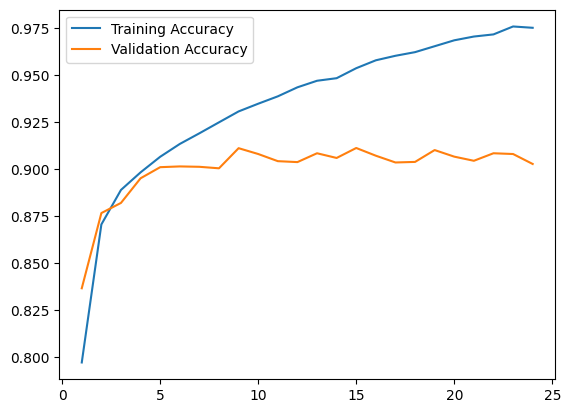

In [33]:
#Evaluate model with test data to get scores on "reaL " data.
scor = model.evaluate(x_test , y_test , verbose=0)
print('Test loss:' , scor[0]) # Corrected variable name and index
print('Test accuracy:' , scor[1]) # Corrected variable name

# plot data see relationship in training and validation data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
epoch_list = list(range(1 , len(hist.history['accuracy'])+1)) # values for x axis [1,2,.....]
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy' , 'Validation Accuracy'))
plt.show()

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363,008 (1.38 MB)

 Trainable params: 121,002 (472.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 242,006 (945.34 KB)